### Libraries Directories and Data



- We are learning to load a csv file to our collab, after loading the data we will have access to the data to do further operations.

In [1]:
 # Copy the directory path and then paste it using cd command
 %cd /content/drive/MyDrive/Business Analyst Workbooks/Basic Statistics

/content/drive/MyDrive/Business Analyst Workbooks/Basic Statistics


- Now that we have loaded the directory and the compiler has reflected it we need to import the necessary libraries to perform the operations

In [2]:
# Import the necessary libraries like this
import pandas as pd
import seaborn as sns

- The libraries have been imported successfully now we need to load the .csv formatted dataset to perform the operations.

In [3]:
# Loading the dataset into a dataframe
df = pd.read_csv("Baseball.csv")

- The dataframe has been loaded now we need to check the data we can use .head() to see the first few entries.

In [5]:
# Display the first few entries
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


### Arithmetic Mean

- This is also known as average.

- There are many columns to gegt to know about them we have a separate file.

- Now to find the mean or average of Runs Scored (RS) we can do it by:

In [6]:
# Mean of Runs Scored (RS)
df.RS.mean()

715.0819805194806

- We found out the average and it is 715.0819805194806 as displayed but it doesn't make much sense. So let's calculate mean runs scored by team Arizona (ARI)

In [7]:
# Mean of Runs Scored (RS) by Team Arizona (ARI)
df.loc[df.Team == "ARI"].RS.mean()

742.2

- Break this down as a multi step process to understand this

- df.loc[ ] is used to get rows or columns based on data.

- From the dataframe we wanted rows with "ARI" so we loaded that using df.Team == "ARI".

- Out of all those rows we wanted the runs scored column (RS) we took that and we found out the mean of the row.

- If we wanted to find the average of the Team Arizona since the year 2005.

In [13]:
# Mean of runs scored (RS) by Team Arizona (ARI) since the year 2005
df.loc[(df.Team == "ARI") & (df.Year > 2005)].RS.mean()

729.0

- First we accessed the dataframe.

- Then using loc we need to specify the conditions.

- Separate the conditions using the brackets.

- As both the conditions need to be true we use '&' symbol.

- We need to access the Runs Scored column and then calculate the mean of it.

In [14]:
# Question: What is the mean of Runs Allowed (RA) for Team Chicago (CHC) until the year 2007
df.loc[(df.Team == "CHC") & (df.Year < 2007)].RA.mean()

728.170731707317


### Median

Median is the central number of the dataset.

[1,2,3,4] - for this set the median is '3'.

[1,2,3,5,10] - for this set the median is '4' because we average the middle elements '3' and '5' and the average of those numbers is '4'.

When the dataset is too complicated or if it has many extreme values and outliers we will use median to eliminate those outliers and use the remaining dataset for precision.

If you want to print multiple lines of code then we need to use print() statement.

In [15]:
# Mean and Median of the Wins (W)
print(df.W.mean())
print(df.W.median())

80.90422077922078
81.0


In [20]:
# Question - Median of wins of the Baltimore team (BAL) until 2000
df.loc[(df.Team == "BAL") & (df.Year <= 2000)].W.median()

89.0

### Mode



- This is the most frequently occuring number in a set.

- [1,2,3,3,4,5] - for this set '3' is the mode.

- [1,2,3,3,4,4,5] - for this set '3' and '4' are the mode.

In [22]:
# To find out the Mean, Median and Mode of On-Base Percentage (OBP)
print(df.OBP.mean())
print(df.OBP.median())
print(df.OBP.mode())

0.32633116883116886
0.326
0    0.322
Name: OBP, dtype: float64


In [25]:
# Question - Mode of OBP during the year 2010
df.loc[(df.Year == 2010)].OBP.mode()

0    0.332
Name: OBP, dtype: float64

### Correlation



- This measures the strength of the relationship between two variables.

- The range varies from -1 to 1.

- If the value is '1' then it is a positive relationship, (summer and icecream)

- If the value is '-1' then it is a negative relationship, (winter and icecream)

- If the value is '0', then there is no relation between the variables.

- Just because there is a relationship occuring that doesn't mean they are dependent on each other to occur.

In [27]:
# Pick variables to correlate and store it in a variable
# Variables are (RS), (RA) and (W).
df_correlation = df[["RS","RA","W"]]
df_correlation.head(1)

,RS,RA,W
0,734,688,81


- Now that the necessary columns have been picked we need to correlate them using .corr() function.

In [28]:
df_correlation.corr()

,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


- The correlation has been generated we need to visualize it.

- We had imported Seaborn library as 'sns' so we can use that to generate heatmap of the correlation.

<Axes: >

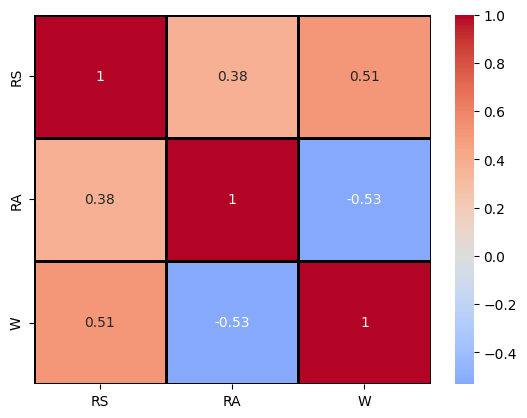

In [37]:
# Correlation Heatmap
sns.heatmap(data = df_correlation.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

- This is an Axes-level function and will draw the heatmap, there are various parameters attached to it.

- We have used few of them and would like to mention about them.

- Data parameter to describe the data that will be used for heatmap.

- Annot parameter: If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

- Fmt parameter: String formatting code to use when adding annotations.

- Center parameter: The value at which to center the colormap when plotting divergent data. Using this parameter will change the default cmap if none is specified.

- Cmap parameter: The mapping from data values to color space. If not provided, the default will depend on whether center is set.

- Linewidths: Width of the lines that will divide each cell.

- Linecolor: Color of the lines that will divide each cell.

In [38]:
# Question: Correlation matrix between OBP, SLG and BA.
# Do a heatmap with two parameters changed
df_co = df[['OBP','SLG','BA']]
df_co.head(1)

,OBP,SLG,BA
0,0.328,0.418,0.259


In [40]:
# Creating a correlation
df_co.corr()

,OBP,SLG,BA
OBP,1.000000,0.790910,0.851958
SLG,0.790910,1.000000,0.790481
BA,0.851958,0.790481,1.000000


<Axes: >

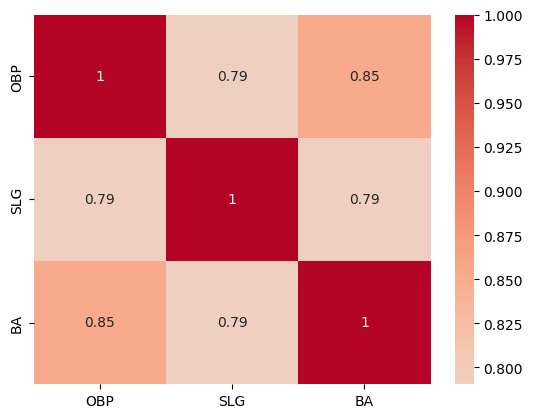

In [47]:
# Heatmap for the correlation
sns.heatmap(data = df_co.corr(),
            annot = True,
            fmt = '.2g',
            center = 0.75,
            cmap = 'coolwarm')

<Axes: >

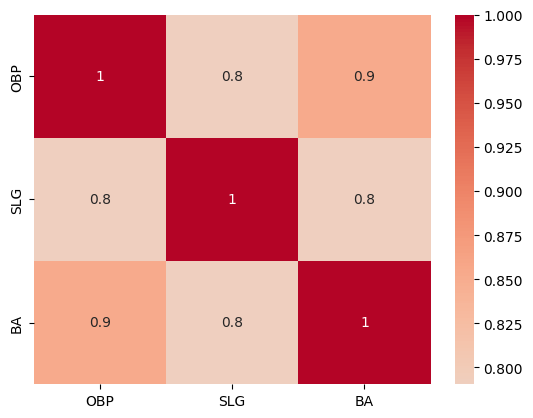

In [50]:
# Heatmap for the correlation for rounding off to one decimal
sns.heatmap(data = df_co.corr(),
            annot = True,
            fmt = '.1g',
            center = 0.75,
            cmap = 'coolwarm')

# Standard Deviation

- This is used to measure the variation of set of values in simple terms we can find out the number of occurences of a value in a set of values.

- Higher the variability higher the range of values and vice-versa.

In [51]:
# Mean and Standard Deviation of the OOBP column
print("The mean of OOBP is", df.OOBP.mean())
print("The standard deviation of OOBP is", df.OOBP.std())

The mean of OOBP is 0.3322642857142857
The standard deviation of OOBP is 0.015295316041389943


In [52]:
# Question - What is the mean and standard deviation of Batting Average (BA)
print("The mean of BA", df.BA.mean())
print("The standard deviation of BA", df.BA.std())

The mean of BA 0.25927272727272727
The standard deviation of BA 0.012907228928000314
